Load the data

Load the data

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Aditya\OneDrive\Desktop\project1\Business-Analysis\Data\clothing_top_seller_dataset.csv")
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     500 non-null    object 
 1   category       500 non-null    object 
 2   price          500 non-null    float64
 3   rating         500 non-null    float64
 4   reviews        500 non-null    int64  
 5   material       500 non-null    object 
 6   brand          500 non-null    object 
 7   color          500 non-null    object 
 8   season         500 non-null    object 
 9   discount_pct   500 non-null    int64  
 10  stock          500 non-null    int64  
 11  units_sold     500 non-null    int64  
 12  is_top_seller  500 non-null    int64  
 13  launch_date    500 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 54.8+ KB


((500, 14), None)

In [205]:

data['is_top_seller'].dtype

dtype('int64')

Check for numeric columns

In [207]:
num_col = data.select_dtypes(include=[np.number])
num_col.head()

,price,rating,reviews,discount_pct,stock,units_sold,is_top_seller
0,1076.60,4.36,3530,54,27,1987,1
1,742.58,4.22,1286,2,196,829,0
2,1276.74,3.82,3179,13,190,1791,0
3,1928.20,4.58,3654,37,50,2053,1
4,1607.05,3.46,2359,49,148,1383,0


Check for outliers

In [208]:
def remove_outliers_iqr(df):
    outlier_summary = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        outlier_percentage = (len(outliers) / len(df)) * 100
        outlier_summary[col] = round(outlier_percentage, 2)
    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['% Outliers']).sort_values(by='% Outliers', ascending=False)

iqr_outliers = remove_outliers_iqr(num_col)
iqr_outliers.head(15)

,% Outliers
price,2.4
reviews,1.0
units_sold,0.6
rating,0.4
discount_pct,0.0
stock,0.0
is_top_seller,0.0


Identifying outliers by Z-Score

In [209]:

from scipy import stats

z_scores = np.abs(stats.zscore(num_col.select_dtypes(include=[np.number]), nan_policy='omit'))
outliers_z = (z_scores > 3).sum(axis=0)
outlier_percent_z = (outliers_z / len(num_col)) * 100
pd.DataFrame(outlier_percent_z, columns=['% Outliers (Z-score)']).sort_values(by='% Outliers (Z-score)', ascending=False).head(15)

,% Outliers (Z-score)
0,1.4
2,1.0
3,1.0
5,0.6
1,0.4
4,0.0
6,0.0


Creating Boxplot

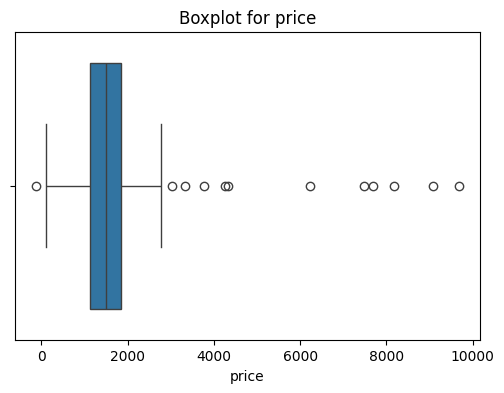

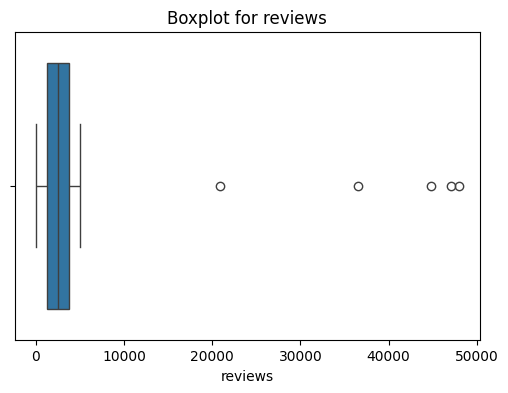

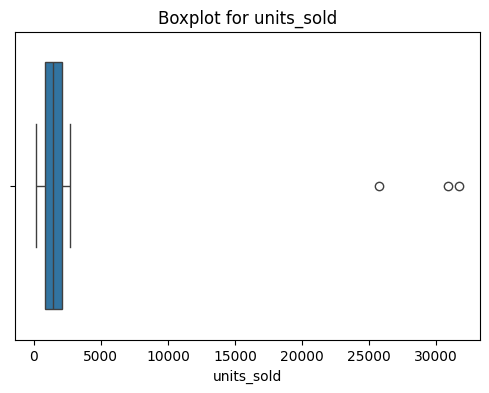

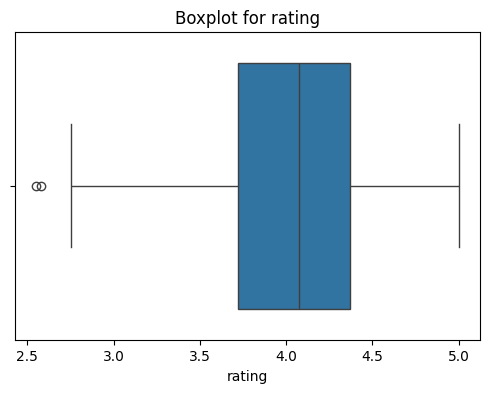

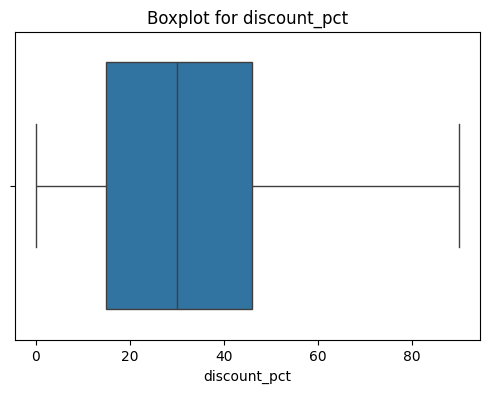

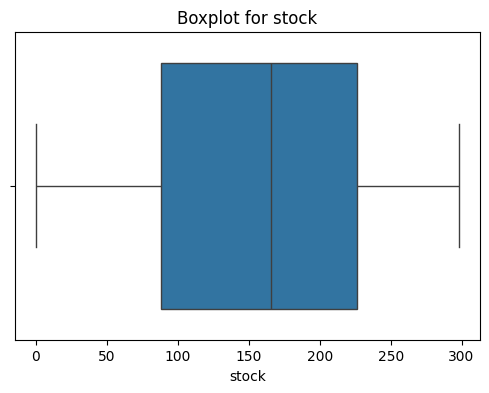

In [210]:
col_to_plot = ['price', 'reviews', 'units_sold', 'rating', 'discount_pct', 'stock']

for col in col_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col],orient='h')
    plt.title(f"Boxplot for {col}")
    plt.show()

Boxplot after capping

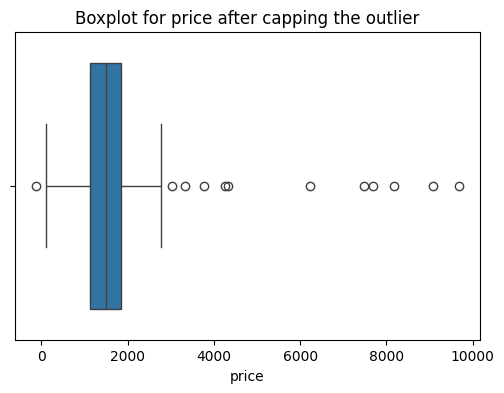

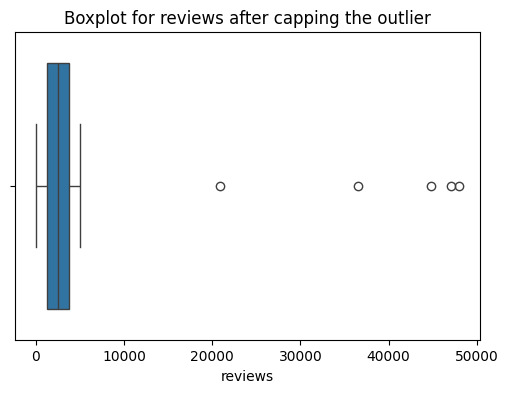

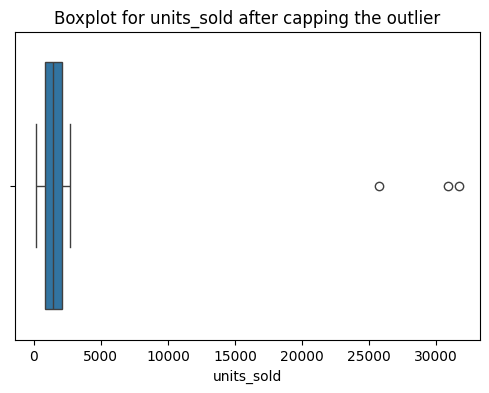

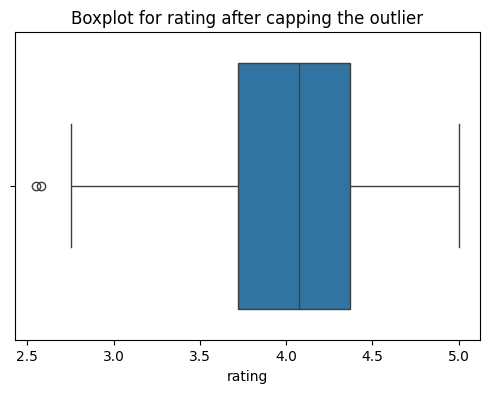

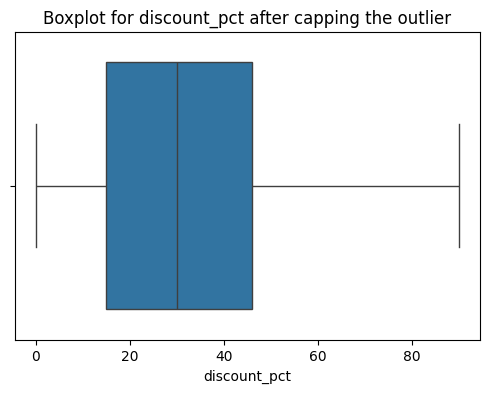

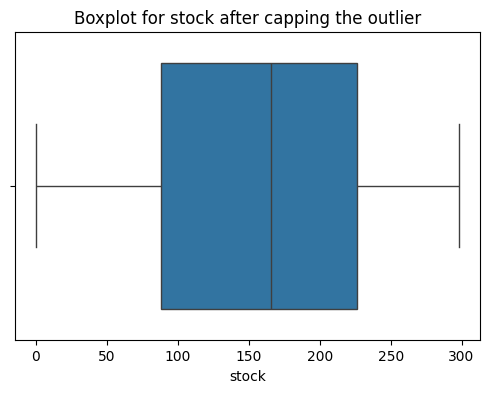

In [211]:
col_to_plot = ['price', 'reviews', 'units_sold', 'rating', 'discount_pct', 'stock']

for col in col_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col],orient='h')
    plt.title(f"Boxplot for {col} after capping the outlier")
    plt.show()

Checking for null values

In [212]:
print(data.isnull().sum())

product_id       0
category         0
price            0
rating           0
reviews          0
material         0
brand            0
color            0
season           0
discount_pct     0
stock            0
units_sold       0
is_top_seller    0
launch_date      0
dtype: int64


Selecting categorial data

In [247]:
categorial_cols = data.select_dtypes(include=['object', 'category'])
categorial_cols.head()

,product_id,category,material,brand,color,season,launch_date
0,P0001,Kurti,Denim,BrandB,White,All Season,2024-06-11
1,P0002,Sweater,Cotton,BrandA,Blue,Winter,2023-04-24
2,P0003,Jacket,Silk,BrandE,Red,Winter,2025-10-24
3,P0004,Kurti,Wool,BrandD,Yellow,Winter,2023-08-22
4,P0005,Dress,Linen,BrandB,Red,Winter,2025-03-16


In [248]:
print(categorial_cols.nunique())

product_id     500
category         8
material         6
brand            5
color            8
season           4
launch_date    392
dtype: int64


Encoding the categorical data:

Binary-class categories - label encoding = ( product_id )
Multi-class categories - One-Hot Encoding = (Category,Material,Brand , color,Season, launch_date)

In [249]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding (binary)
le = LabelEncoder()
data['product_id'] = le.fit_transform(categorial_cols['product_id'])

# One-Hot Encoding (multi-category)
ready_data = pd.get_dummies(data, columns=[ 'category', 'material', 'brand', 'color', 'season', 'launch_date'], drop_first = True)

print("Encoding done! Now the data is fully numeric")


Encoding done! Now the data is fully numeric


In [250]:
data.head()

,product_id,category,price,rating,reviews,material,brand,color,season,discount_pct,stock,units_sold,is_top_seller,launch_date
0,0,Kurti,1076.60,4.36,3530,Denim,BrandB,White,All Season,54,27,1987,1,2024-06-11
1,1,Sweater,742.58,4.22,1286,Cotton,BrandA,Blue,Winter,2,196,829,0,2023-04-24
2,2,Jacket,1276.74,3.82,3179,Silk,BrandE,Red,Winter,13,190,1791,0,2025-10-24
3,3,Kurti,1928.20,4.58,3654,Wool,BrandD,Yellow,Winter,37,50,2053,1,2023-08-22
4,4,Dress,1607.05,3.46,2359,Linen,BrandB,Red,Winter,49,148,1383,0,2025-03-16


Feature scaling

In [251]:
print(type(num_col))
print(num_col.head() if hasattr(num_col, "head") else num_col)

<class 'pandas.core.frame.DataFrame'>
     price  rating  reviews  discount_pct  stock  units_sold  is_top_seller
0  1076.60    4.36     3530            54     27        1987              1
1   742.58    4.22     1286             2    196         829              0
2  1276.74    3.82     3179            13    190        1791              0
3  1928.20    4.58     3654            37     50        2053              1
4  1607.05    3.46     2359            49    148        1383              0


Make all columns Numeric

In [258]:
# Detect numeric columns properly
numeric_cols = data.select_dtypes(include=['int64','float64']).columns

# Now this will work
data[numeric_cols].agg(['min', 'max'])

,product_id,price,rating,reviews,discount_pct,stock,units_sold,is_top_seller
min,0,-1.860886,2.55,-0.695019,0,0,-0.631386,0
max,499,8.889651,5.00,11.082964,90,298,13.157887,1


Drop unwanted column

In [239]:
data.drop(columns=['product_id'])

,category,price,rating,reviews,material,brand,color,season,discount_pct,stock,units_sold,is_top_seller,launch_date
0,Kurti,-0.546812,4.36,0.169846,Denim,BrandB,White,All Season,54,27,0.167599,1.527525,2024-06-11
1,Sweater,-0.913431,4.22,-0.381349,Cotton,BrandA,Blue,Winter,2,196,-0.339096,-0.654654,2023-04-24
2,Jacket,-0.327139,3.82,0.083630,Silk,BrandE,Red,Winter,13,190,0.081837,-0.654654,2025-10-24
3,Kurti,0.387900,4.58,0.200304,Wool,BrandD,Yellow,Winter,37,50,0.196478,1.527525,2023-08-22
4,Dress,0.035407,3.46,-0.117787,Linen,BrandB,Red,Winter,49,148,-0.096688,-0.654654,2025-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Kurti,0.186480,3.21,-0.418193,Cotton,BrandE,Red,Monsoon,23,283,-0.385040,-0.654654,2023-06-03
496,Dress,-0.752787,3.51,-0.007008,Wool,BrandE,Pink,Monsoon,10,236,-0.015739,-0.654654,2024-04-20
497,Sweater,0.309202,4.47,-0.580555,Wool,BrandB,Black,Monsoon,45,193,-0.499681,-0.654654,2024-07-18
498,T-Shirt,-0.213977,3.51,-0.007008,Wool,BrandA,Green,All Season,33,286,-0.001300,-0.654654,2025-08-22


In [260]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['price', 'reviews', 'units_sold']
scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [261]:
data[cols_to_scale].agg(['min', 'max'])

,price,reviews,units_sold
min,-1.860886,-0.695019,-0.631386
max,8.889651,11.082964,13.157887
